<a href="https://colab.research.google.com/github/Narayani0411/Machine-Learning-Deep-Learning/blob/main/Solar_Power_Generation_data_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOLAR POWER GENERATION DATA ANALYSIS AND PREDICTION MODEL**


---



# **READING DATASET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/solar_data_copy_10%.csv')

In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,94.283552,89.002824,93.334288,94.142984,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,94.177872,89.334664,93.633208,94.107592,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,93.703480,88.844592,92.982568,93.650656,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,97.112320,91.963472,96.146384,97.147776,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,97.253520,91.980872,96.110968,97.341296,80.500312,5.365144,431.89576


In [ ]:
data.shape

(1009, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1009 non-null   object 
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   RTD_2              1009 non-null   float64
 8   RTD_3              1009 non-null   float64
 9   RTD_4              1009 non-null   float64
 10  RTD_5              1009 non-null   float64
 11  Array_Voltage      1009 non-null   float64
 12  Array_Current      1009 non-null   float64
 13  Power_Generated    1009 non-null   float64
dtypes: float64(13), object(1)
memory usage: 110.5+ KB


**CHANGING DATA TYPE**

It's great if we change column consisting of an odd data type to the one we need.


In [ ]:
data['Timestamp'] = pd.to_numeric(data['Timestamp'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          0 non-null      float64
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   RTD_2              1009 non-null   float64
 8   RTD_3              1009 non-null   float64
 9   RTD_4              1009 non-null   float64
 10  RTD_5              1009 non-null   float64
 11  Array_Voltage      1009 non-null   float64
 12  Array_Current      1009 non-null   float64
 13  Power_Generated    1009 non-null   float64
dtypes: float64(14)
memory usage: 110.5 KB


#**GRAPHICAL VISUALIZATION OF DATA**

Visualization of dataset is important to find out if data is of linear type or not.

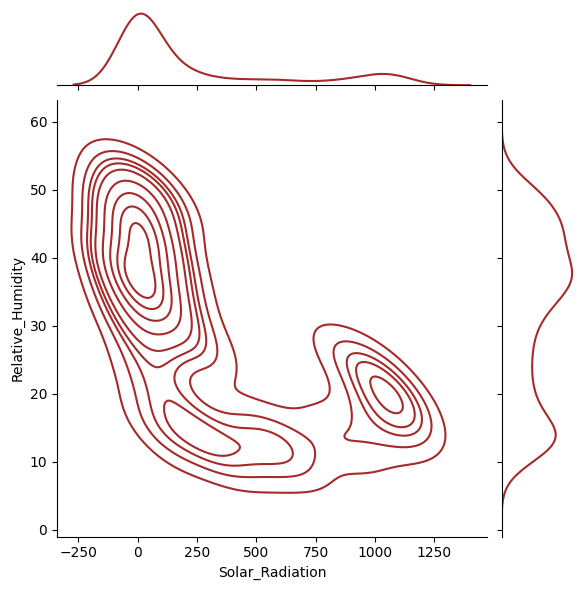

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

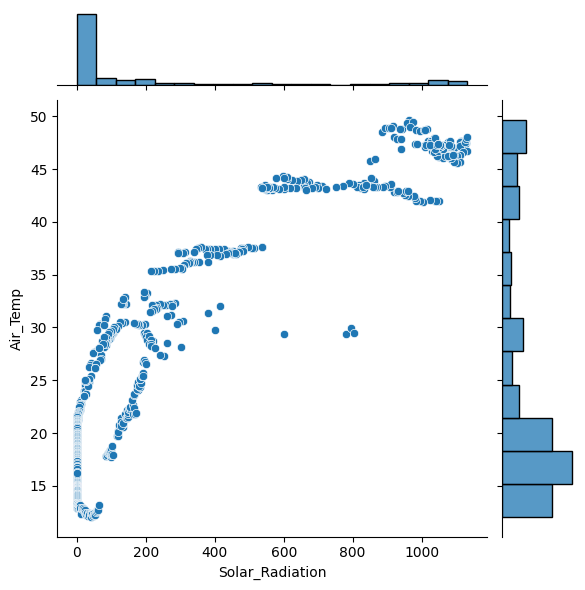

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Air_Temp',data = data)

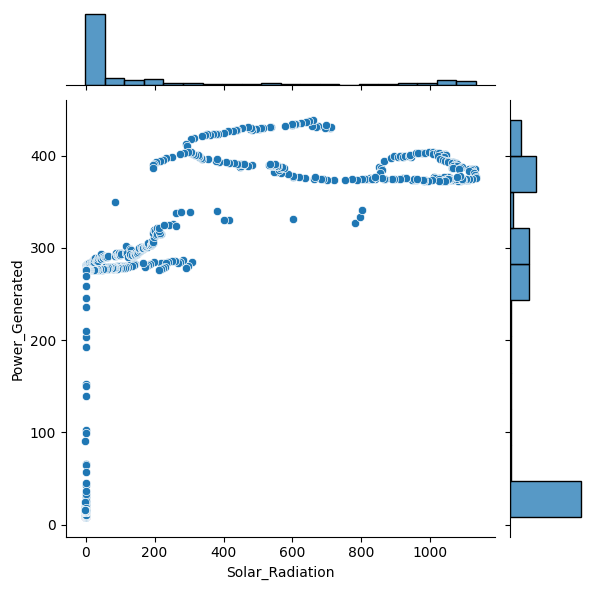

In [ ]:
sns.jointplot(x='Solar_Radiation', y='Power_Generated', data = data)

**OBSERVATION**

On observing the above graphs, We came to know that the given dataset is not linear and hence **Non-Linear** models are to be used.

**DRAWING HEATMAP**

Heatmap makes it simple to remove some more columns , since they directly shows relation between each column. If any of them show 1 , it means that they resemble the same output and can be removed sparring any one.

In [ ]:
data.corr()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,RTD_2,RTD_3,RTD_4,RTD_5,Array_Voltage,Array_Current,Power_Generated
Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air_Temp,NaN,1.000000,-0.881522,0.553201,0.332521,0.926546,0.947060,0.939768,0.941827,0.942763,0.944076,0.820737,-0.954264,0.818539
Relative_Humidity,NaN,-0.881522,1.000000,-0.527177,-0.269776,-0.685155,-0.834347,-0.842189,-0.841937,-0.836790,-0.837487,-0.748393,0.953650,-0.746166
Wind_Speed,NaN,0.553201,-0.527177,1.000000,0.197639,0.538768,0.601840,0.604302,0.602146,0.601604,0.601290,0.481086,-0.537450,0.479723
Wind_Direction,NaN,0.332521,-0.269776,0.197639,1.000000,0.337300,0.317677,0.309743,0.312000,0.314743,0.316612,0.237368,-0.286299,0.236458
Solar_Radiation,NaN,0.926546,-0.685155,0.538768,0.337300,1.000000,0.915295,0.901310,0.905277,0.909054,0.909236,0.732484,-0.820339,0.730455
RTD_1,NaN,0.947060,-0.834347,0.601840,0.317677,0.915295,1.000000,0.998383,0.998348,0.998685,0.998965,0.805599,-0.924697,0.803235
RTD_2,NaN,0.939768,-0.842189,0.604302,0.309743,0.901310,0.998383,1.000000,0.999661,0.998975,0.998550,0.803121,-0.926478,0.800739
RTD_3,NaN,0.941827,-0.841937,0.602146,0.312000,0.905277,0.998348,0.999661,1.000000,0.998783,0.998309,0.803007,-0.928012,0.800618
RTD_4,NaN,0.942763,-0.836790,0.601604,0.314743,0.909054,0.998685,0.998975,0.998783,1.000000,0.999572,0.809187,-0.923945,0.806862


<Axes: >

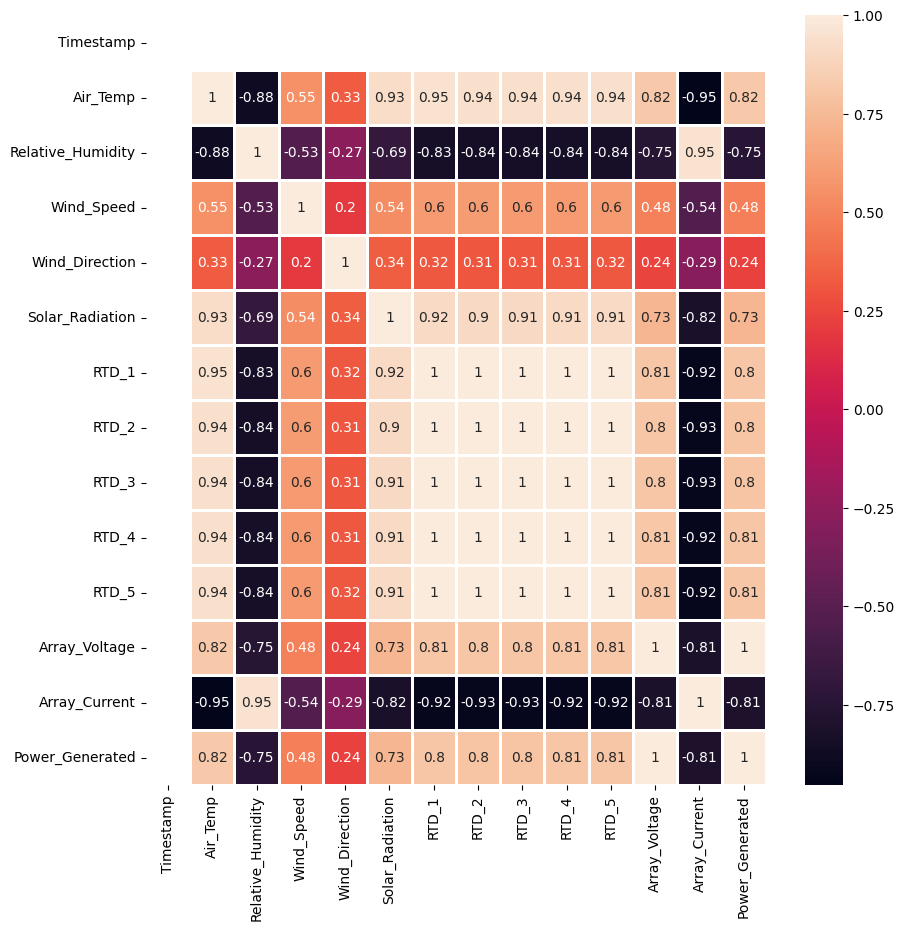

In [ ]:
df = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df, annot = True, linewidths=1)

In [ ]:
data = data.drop(['RTD_2','RTD_3','RTD_4','RTD_5'],axis=1)
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,Power_Generated
0,NaN,43.349172,12.790256,0.533333,118.786620,707.53384,98.289640,80.178232,5.364869,430.14572
1,NaN,43.433980,11.468986,1.866667,84.681408,710.46328,98.377480,80.266728,5.366041,430.71452
2,NaN,43.286580,11.047298,2.866667,40.807156,695.51016,97.868064,80.187416,5.365501,430.24568
3,NaN,43.523020,12.058292,0.000000,66.390848,696.24472,101.470960,80.727760,5.364512,433.06504
4,NaN,43.728656,10.722330,2.266667,2.127408,674.05752,101.664240,80.500312,5.365144,431.89576


**PLOTTING FINAL HEATMAP**

<Axes: >

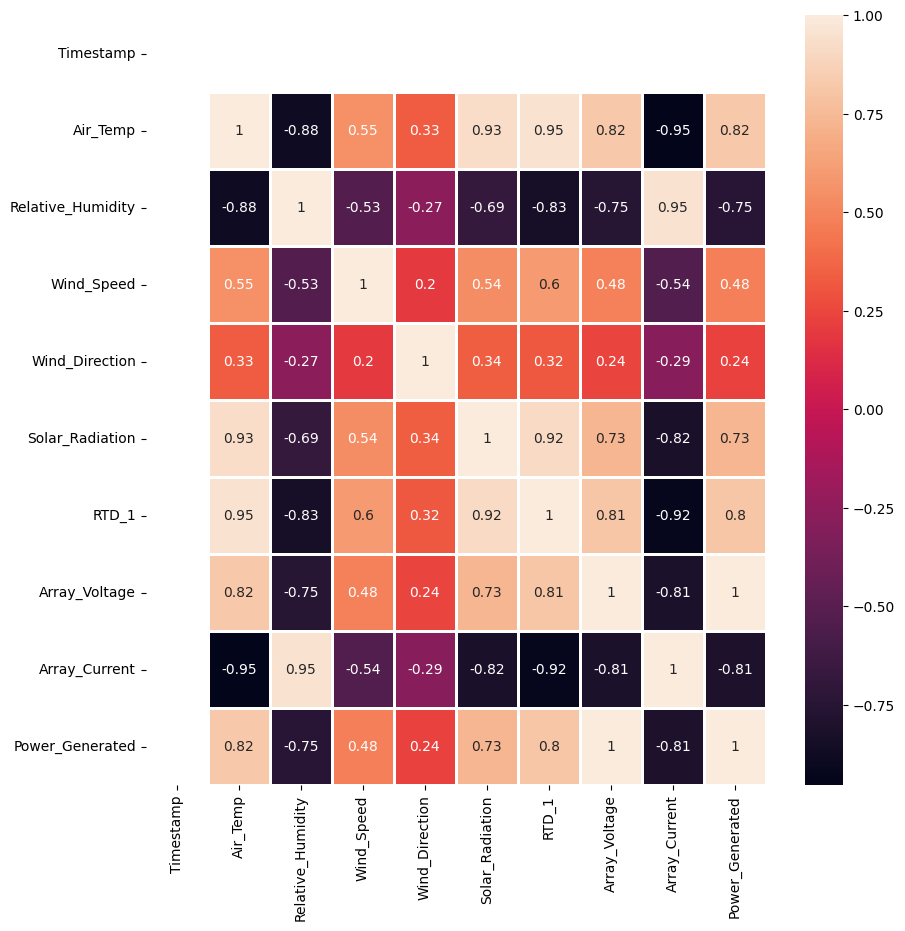

In [ ]:
df= data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(df, annot=True, linewidths=1)

**PLOTTING POWER GENERATION GRAPH**

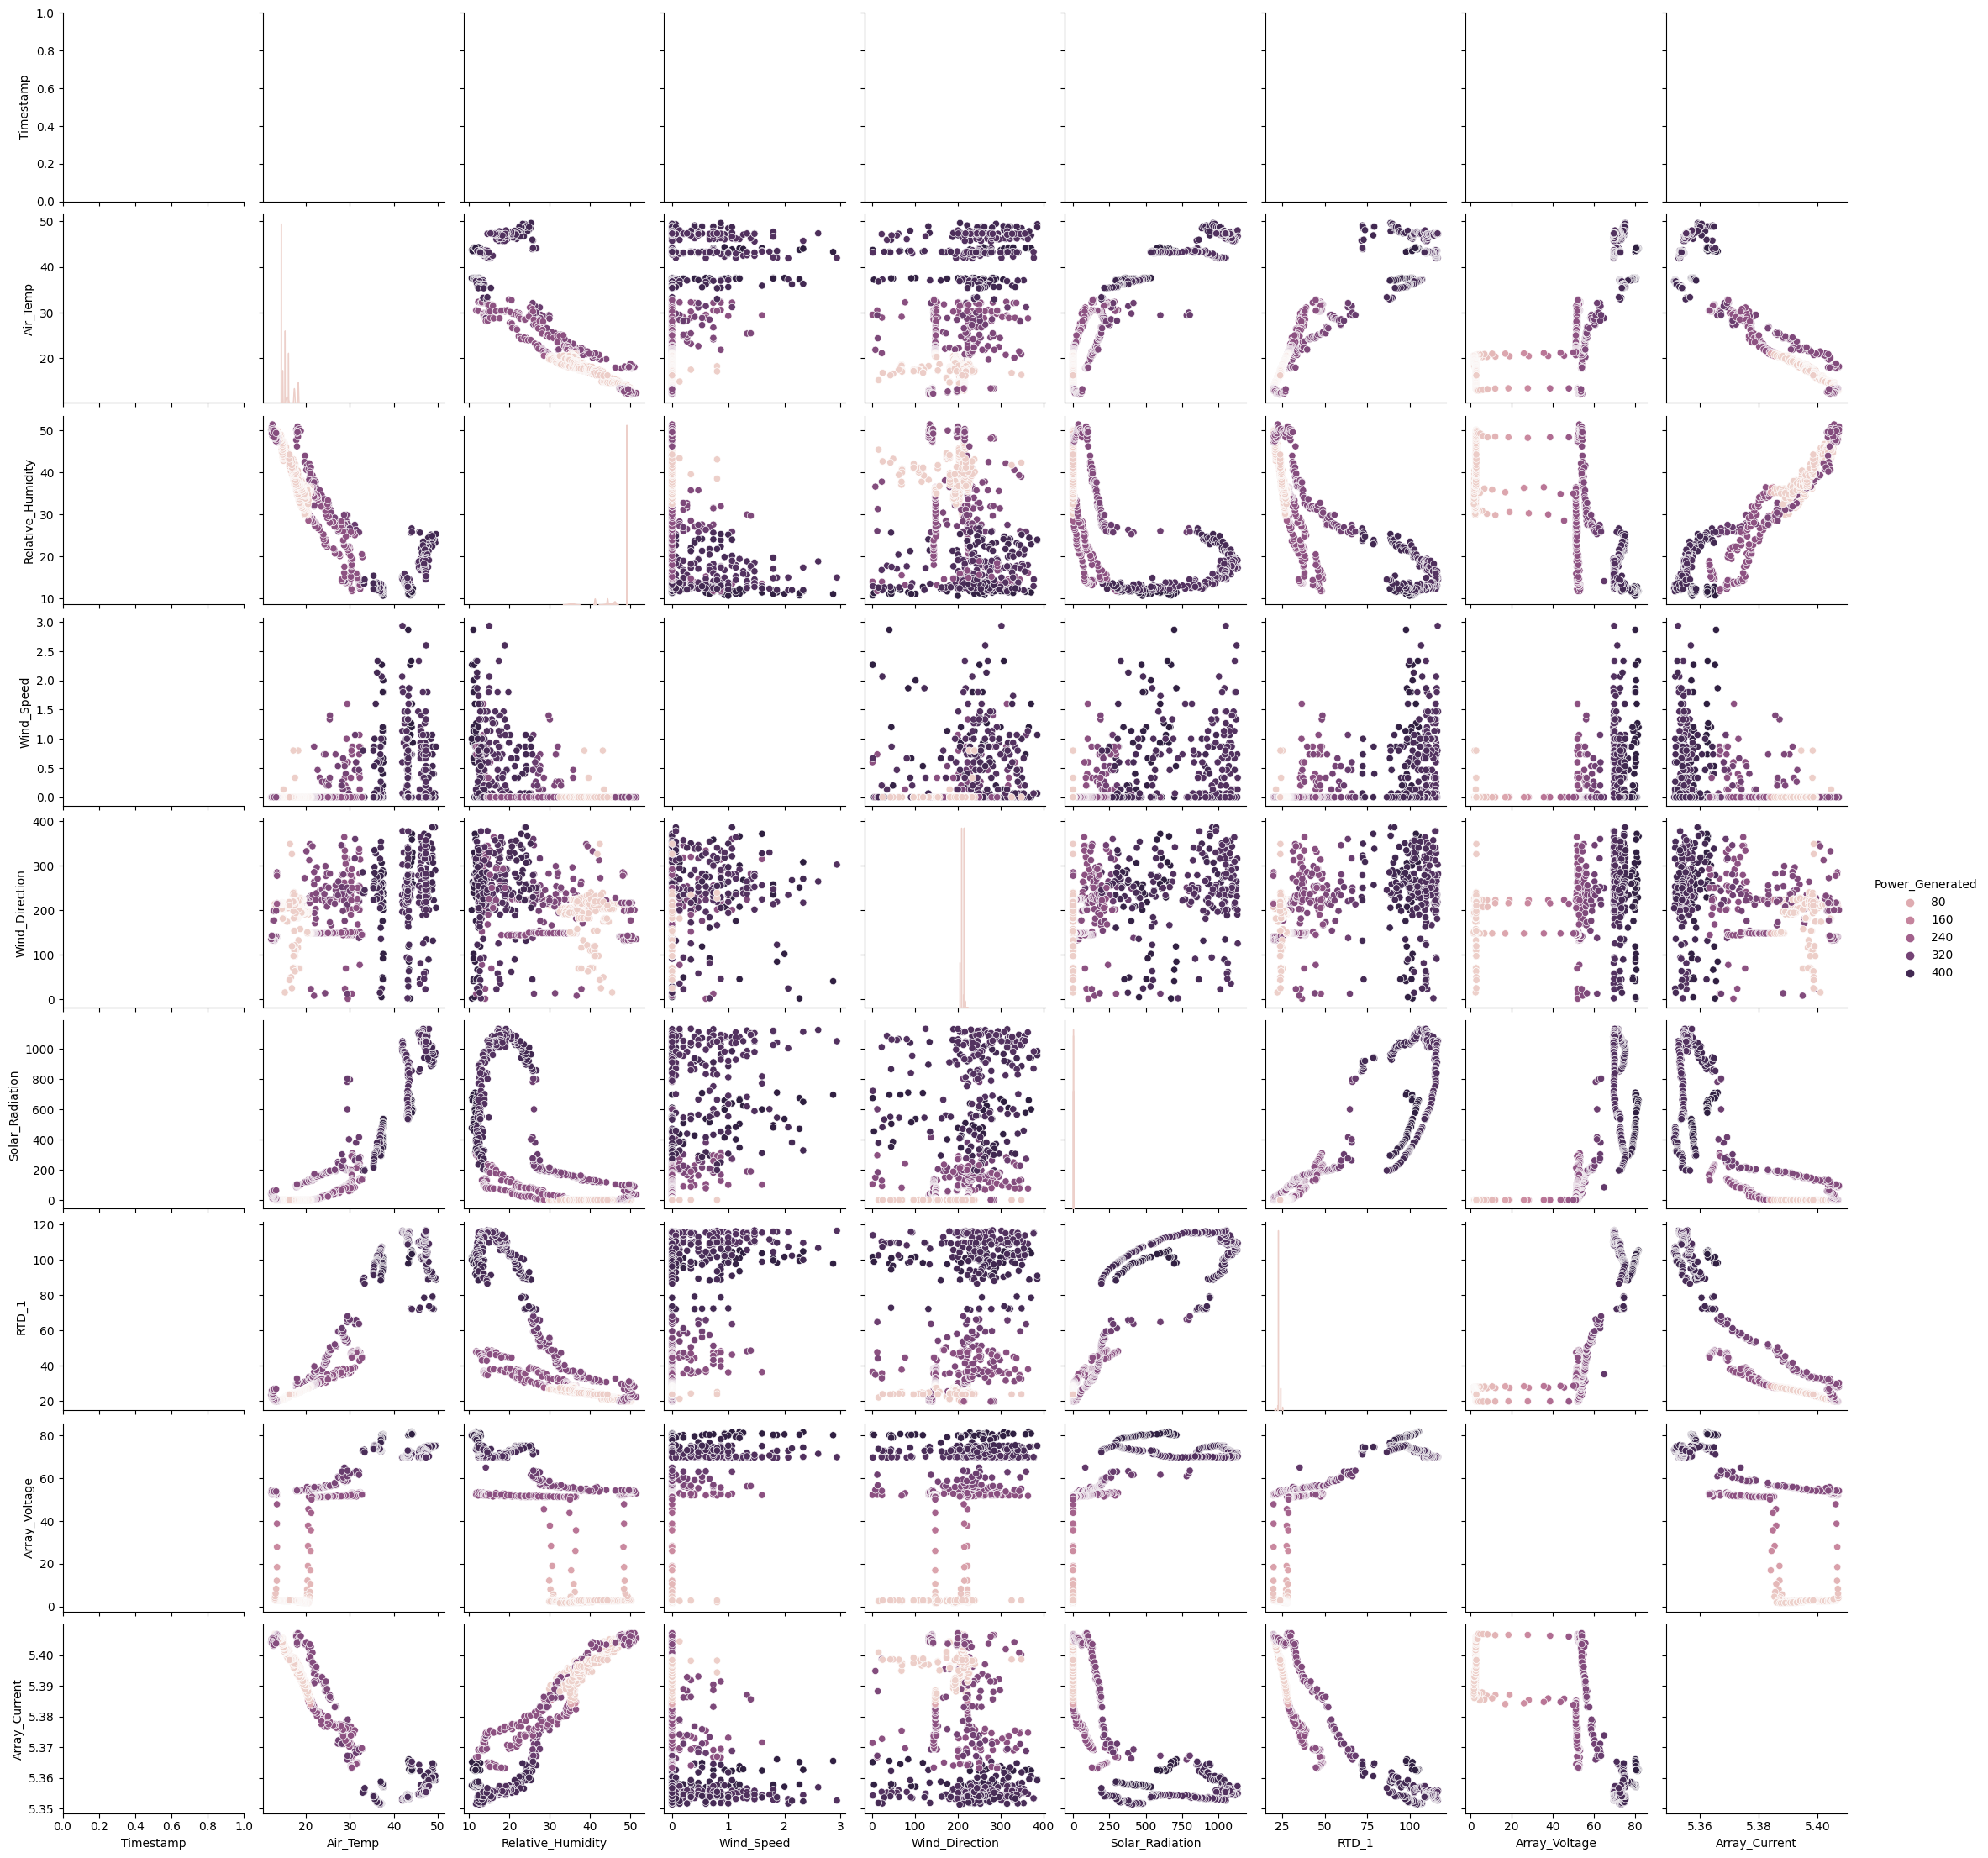

In [ ]:
sns.pairplot(data, hue='Power_Generated')

#**STANDARIZATION OF DATA**

standaring whole data set into standard scale. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','Solar_Radiation','Array_Voltage','Array_Current','Power_Generated']

data[numericals] = scaler.fit_transform(data[numericals])

In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,Power_Generated
0,NaN,1.574564,-1.543618,0.814157,118.786620,1.352771,98.289640,1.486584,-1.019787,1.485977
1,NaN,1.581984,-1.650873,3.883984,84.681408,1.360968,98.377480,1.489439,-0.957215,1.489400
2,NaN,1.569087,-1.685103,6.186353,40.807156,1.319129,97.868064,1.486880,-0.986045,1.486579
3,NaN,1.589775,-1.603036,-0.413772,66.390848,1.321185,101.470960,1.504315,-1.038847,1.503541
4,NaN,1.607768,-1.711483,4.804932,2.127408,1.259106,101.664240,1.496976,-1.005105,1.496506


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          0 non-null      float64
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   Array_Voltage      1009 non-null   float64
 8   Array_Current      1009 non-null   float64
 9   Power_Generated    1009 non-null   float64
dtypes: float64(10)
memory usage: 79.0 KB


In [ ]:
data.head()

,Timestamp,Air_Temp,Relative_Humidity,Wind_Speed,Wind_Direction,Solar_Radiation,RTD_1,Array_Voltage,Array_Current,Power_Generated
0,NaN,1.574564,-1.543618,0.814157,118.786620,1.352771,98.289640,1.486584,-1.019787,1.485977
1,NaN,1.581984,-1.650873,3.883984,84.681408,1.360968,98.377480,1.489439,-0.957215,1.489400
2,NaN,1.569087,-1.685103,6.186353,40.807156,1.319129,97.868064,1.486880,-0.986045,1.486579
3,NaN,1.589775,-1.603036,-0.413772,66.390848,1.321185,101.470960,1.504315,-1.038847,1.503541
4,NaN,1.607768,-1.711483,4.804932,2.127408,1.259106,101.664240,1.496976,-1.005105,1.496506


#**PREDICTION AND EVALUATION**

**Gradient boosting** is an ensemble machine learning algorithm. Boosting refers to a class of ensemble learning algorithms that add tree models to an ensemble sequentially. 

It prevents overfitting by making predictions for all individual decision trees and averaging the regression results. Gradient boosting, on the other hand, is a technique for repeatedly adding decision trees so that the next decision tree corrects the previous decision tree error.

**Histogram Gradient Boosting** estimator has native support for missing values.

And **Regression** algorithms are used to predict the continuous values.

That's why we are going to use **HistGradientBoostingRegressor**.

## **Power Generation with respect to whole dataset**

In [ ]:
y = data.pop('Power_Generated')

In [ ]:
X = data

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(807, 9) (202, 9) (807,) (202,)


In [ ]:
#fit the model
model = HistGradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
#make predictions
y_pred = model.predict(X_test)
print(y_pred)

[-1.02026592  1.34615182  1.50972911  1.19081858 -1.01579335 -0.47973627
  0.71244629 -1.01973091 -1.01548091  1.32391082  0.72398709  1.44501499
 -1.0107199   0.55362013 -1.01146372 -1.01212548  1.50473484 -1.01822198
  0.57380318  1.50539448 -1.01199398  0.56165081  0.59186052  1.48497343
  0.61551586  1.22605878  0.57184407 -1.01555072  0.57896572 -1.01996766
 -1.01662731 -1.04925297  0.65921705 -1.02278314  1.51091361 -1.0505884
 -1.01939541  1.25296985 -1.01702296  0.73967781 -1.02305959  0.87038711
  0.57497763 -1.04636586  0.71420098  1.15389381 -1.01797689  0.91163702
 -1.02110249 -0.95771867  0.5532697   0.6857234   1.16575356 -1.0139196
  1.30184444  0.87982411 -1.01390105  0.72020855 -1.01166815 -1.01860438
  0.57517085  1.24305697  0.63163375 -1.04922213 -1.02411044  1.19043184
 -1.01194626  0.54666622 -1.01712114 -1.01290017 -1.01874097  0.56108764
  1.2600064  -1.04696251 -1.03653481 -1.03715698  0.5791521  -1.01971982
  1.27614974 -1.01077974  1.15108711  1.19227019 -1.0

**Visual representation of Actual values with respect to predicted values**

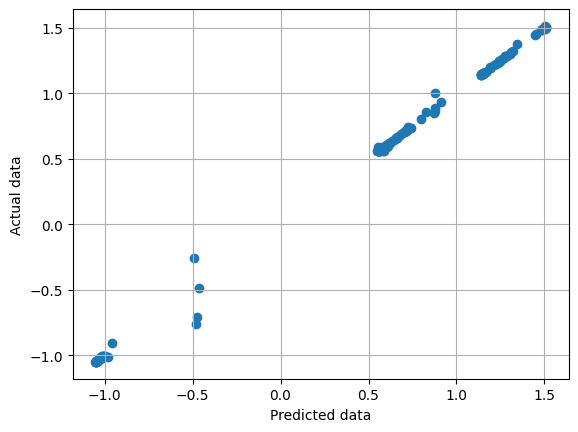

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted data')
plt.ylabel('Actual data')
plt.grid()
plt.show()

**Evaluating the model and finding the error**

In [ ]:
#evaluate prediction
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae)

MAE: 0.008


## **Power Generation with respect to Solar Radiation**

In [ ]:
x = data.pop('Solar_Radiation')

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(807, 8) (202, 8) (807,) (202,)


In [ ]:
#fit the model
model = HistGradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
#make predictions
y_pred = model.predict(X_test)
print(y_pred)

[ 0.96762236 -1.02197301  0.56773236 -1.01076364  1.14507808 -1.01039042
 -1.01416047 -1.03898498 -1.01231903  0.56699908  0.57385841 -1.01527019
  1.1504668   0.60156107 -1.01059634 -1.01177174  0.55533077  0.59790572
 -1.02035013  0.81711275  1.15314354 -1.02232349  1.28237043  0.58906739
 -1.02239647 -0.94456541  0.57718255  0.57413616  1.27683428 -1.01507328
  0.67020878  0.57919533 -1.01672681  1.1534015  -1.02160857 -1.0109913
  0.6737694  -1.01292208  1.51462854 -1.0204856   1.14723144  1.18271902
  1.16475575 -1.00116241  0.57272283 -1.04082228  1.14754404 -0.99891258
  0.57679033  1.41897695  0.84850002  1.1468888   1.51484904  1.25897596
  1.15114304 -1.02070677  0.56397189 -1.01090465 -1.01048943  1.15364092
  0.70950395 -1.01823797  1.14934784 -1.01507329  1.25168837 -1.0200143
  1.27574982 -1.01284561  1.13886709 -1.00228908  0.68484763  1.15554909
  1.23730362  0.6018794   1.1549204  -1.01611308  1.22224089 -1.02209707
  1.31620443  1.49096989  0.64835659 -1.0227665   1.3

**Visual representation of Actual values with respect to predicted values**

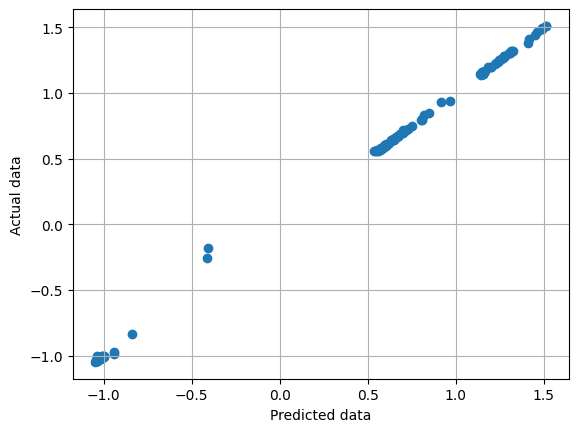

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted data')
plt.ylabel('Actual data')
plt.grid()
plt.show()

**Evaluating the model and finding the error**

In [ ]:
#evaluate prediction
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae)

MAE: 0.005


## **Power Generation with respect to Timestamp**

In [ ]:
x = data.pop('Timestamp')

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(807, 7) (202, 7) (807,) (202,)


In [ ]:
#fit the model
model = HistGradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
#make predictions
y_pred = model.predict(X_test)
print(y_pred)

[ 0.56549309 -1.01903854  0.83836994  1.14138966  0.29844647  0.91781012
  0.85110967 -1.01182018  0.61312522 -1.0128004   1.2895752  -1.02007622
 -1.01285514  1.4036103  -0.92152555  1.3062262  -1.04293956  1.1494462
 -1.05314749  0.80938045  1.26523405  1.15199718 -1.0222014  -1.02053374
 -1.04094264 -1.01130756  1.28251762 -1.00700528  1.15051462  0.5988851
  0.81782594 -1.01491634 -1.01152457  1.483659    1.31089362 -1.01004474
  0.55020427  1.49255915 -1.0482637   0.56223577  1.44809296 -1.01113006
  0.58756842 -1.01984989  0.61905819  0.57325092 -1.01222505  1.23141341
  0.97152221 -1.01327206 -1.03870714  1.13852049  0.65471013  0.57141914
  1.14827195  1.19558794  1.15087067  0.66036377 -1.02369163 -1.04220634
  0.56636974 -1.02120411  1.30720081  0.67475951 -1.01067841  0.58122166
 -1.01285741  0.63923238  1.15042205 -1.02018948  0.65471013 -1.01902849
  1.22584902 -1.01038426  0.57116969  1.13992214  0.54685244  0.59116268
 -1.008394    1.15439521  1.14589053  1.44016592 -1.0

**Visual representation of Actual values with respect to predicted values**

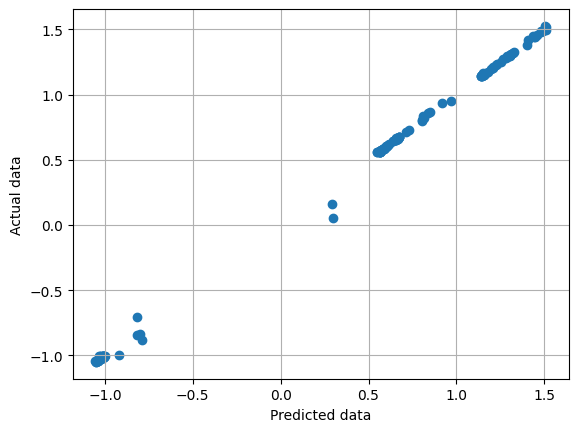

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted data')
plt.ylabel('Actual data')
plt.grid()
plt.show()

**Evaluating the model and finding the error**

In [ ]:
#evaluate prediction
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' %mae)

MAE: 0.007
